# DATA ANALYSIS FOR THE SUN, THE MOON AND CAS A 

In [91]:
import numpy as np 
import matplotlib.pyplot as plt 
import re #regex
import time
from threading import Timer
from datetime import datetime
from pytz import timezone
import pytz
import pandas as pd 
import astropy as ap
from astropy.time import Time 
from astropy import coordinates
from astropy import units as u
from pylab import *
%matplotlib inline

In [2]:
cas_voltz = np.load('Cas_data_last.npz')['vv']
cas_timez = np.load('Cas_data_last.npz')['ttt']
cas_new_timez = cas_timez[int(len(cas_timez)/2):] - cas_timez[0]
cas_new_voltz = cas_voltz[int(len(cas_voltz)/2):]-np.mean(cas_voltz[int(len(cas_voltz)/2):])

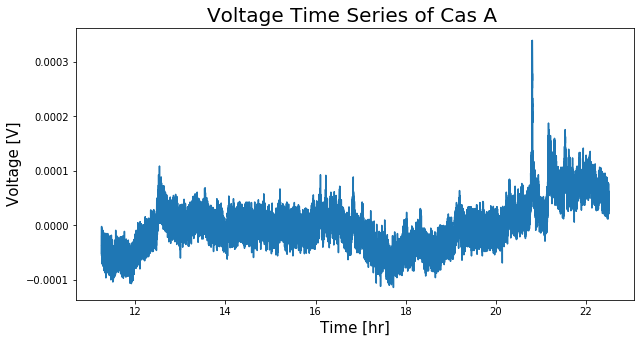

In [3]:
plt.figure(figsize=(10,5))
#plt.plot((cas_timez-cas_timez[0])/3600,cas_voltz-np.mean(cas_voltz))
plt.plot(cas_new_timez/3600,cas_new_voltz)
plt.xlabel('Time [hr]',fontsize = 15)
plt.ylabel('Voltage [V]',fontsize=15)
plt.title('Voltage Time Series of Cas A ',fontsize = 20)
plt.show()

In [4]:
# Shape of cas_voltz is 1620322
## 1521088206.8693759  unix start -- March 14 2018 21:30:06
## 1521169222.345757 unix end -- March 15 2018 20:00:22
# 22 hours 30 minutes and 18 seconds of recording 
Total_rec = 22*60 + 30 + 18./60
print(Total_rec, "Minutes of recording")
print(len(cas_voltz), 'Total size of Cassiopeia A Data ')
cas_dpm = len(cas_voltz)/Total_rec
print(cas_dpm, "Data per minute")
Interval5 = cas_dpm*5
print(Interval5, "data every 5 minutes")
Remainder_data = len(cas_voltz)%1448
print(Remainder_data, "leftover for 5 minutes")
r_cas = cas_voltz[:-Remainder_data]
print(r_cas.shape)

(1350.3, 'Minutes of recording')
(162032, 'Total size of Cassiopeia A Data ')
(119.99703769532697, 'Data per minute')
(599.9851884766348, 'data every 5 minutes')
(1304, 'leftover for 5 minutes')
(160728,)


In [5]:
pcas = np.array([])
for i in np.arange(111):
    cas_slices = r_cas[1448*i:1448*(i+1)]
    prcas = np.abs(np.fft.fft(cas_slices))**2
    if i == 0 :
        pcas = np.append(pcas, np.fft.fftshift(prcas))
    else: 
        pcas = np.vstack((pcas, np.fft.fftshift(prcas)))

(111, 1448)


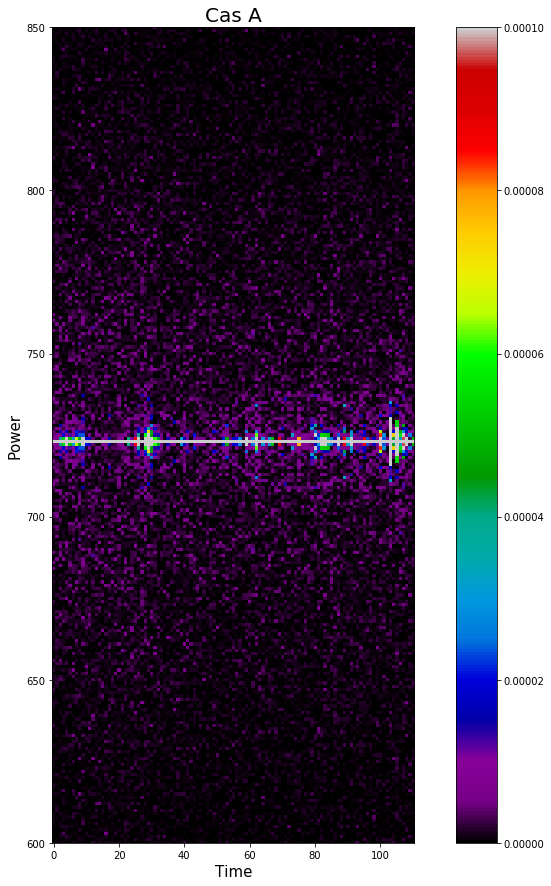

In [6]:
print(pcas.shape)
plt.figure(figsize=(15,15))
plt.imshow(np.rot90(pcas), cmap='hot', clim=(0,0.0001)).set_cmap('nipy_spectral')
plt.ylim(600,850)
plt.title('Cas A',fontsize = 20)
plt.xlabel('Time',fontsize = 15)
plt.ylabel('Power', fontsize = 15)
plt.colorbar()
plt.show()

In [7]:
volt_sun = np.load('Sun_data_last.npz')['vv']
time_sun = np.load('Sun_data_last.npz')['ttt']
time_newsun = time_sun[:-5000] - time_sun[:-5000][0]
volt_newsun =volt_sun[:-5000] - np.mean(volt_sun[:-5000])

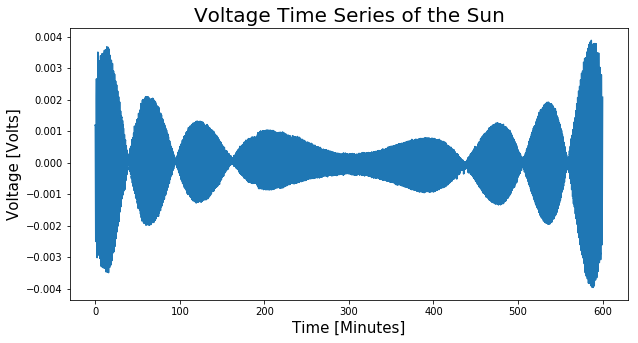

In [8]:
plt.figure(figsize=(10,5))
plt.plot(time_newsun/60,volt_newsun)
plt.title('Voltage Time Series of the Sun',fontsize=20)
plt.xlabel('Time [Minutes]',fontsize=15)
plt.ylabel('Voltage [Volts]',fontsize=15)
plt.show()

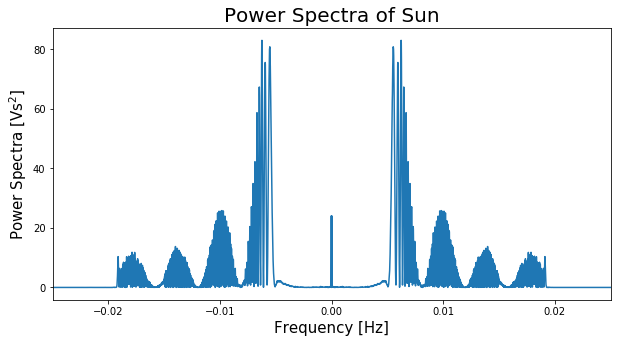

In [9]:
power_sun = np.abs(np.fft.fft(volt_newsun))**2
freq_sun = np.fft.fftfreq(len(volt_newsun),d=0.5)
plt.figure(figsize=(10,5))
plt.plot(np.fft.fftshift(freq_sun),np.fft.fftshift(power_sun))
plt.title('Power Spectra of Sun',fontsize = 20)
plt.xlabel('Frequency [Hz]',fontsize=15)
plt.ylabel('Power Spectra [Vs$^2$]',fontsize = 15)
plt.xlim(-0.025,0.025)
plt.show()



In [10]:
# Shape of volt_sun is 1620322
## 1521039753.2584641 unix start -- March 14, 2018 08:02:33
## 1521077421.1169889 unix end -- March 14, 2018 18:30:21
#  10 hours 17 minutes 48 seconds 
Total_rec = 10*60 + 17 + 48./60
print(Total_rec, "Minutes of recording")
print(len(volt_sun), 'Total size of Sun Data ')
sun_dpm = len(volt_sun)/Total_rec
print(sun_dpm, "Data per minute")
Interval5 = sun_dpm*5
print(Interval5, "data every 5 minutes")
Remainder_data = len(volt_sun)%1206
print(Remainder_data, "leftover for 5 minutes")
r_sun = volt_sun[:-Remainder_data]
print(r_sun.shape)

(617.8, 'Minutes of recording')
(149008, 'Total size of Sun Data ')
(241.19132405309162, 'Data per minute')
(1205.956620265458, 'data every 5 minutes')
(670, 'leftover for 5 minutes')
(148338,)


In [11]:
psun = np.array([])
for i in np.arange(125):
    sun_slices = r_sun[1187*i:1187*(i+1)]
    prsun = np.abs(np.fft.fft(sun_slices))**2
    if i == 0:
        psun = np.append(psun, np.fft.fftshift(prsun))
    else: 
        psun = np.vstack((psun, np.fft.fftshift(prsun)))

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [ ]:
print(psun.shape)
plt.figure(figsize=(15,15))
plt.imshow(np.rot90(psun), cmap='hot', clim=(0,0.01)).set_cmap('nipy_spectral')
plt.ylim(500,700)
plt.title('Sun',fontsize = 20)
plt.xlabel('Time',fontsize = 15)
plt.ylabel('Power', fontsize = 15)
plt.colorbar()
plt.show()

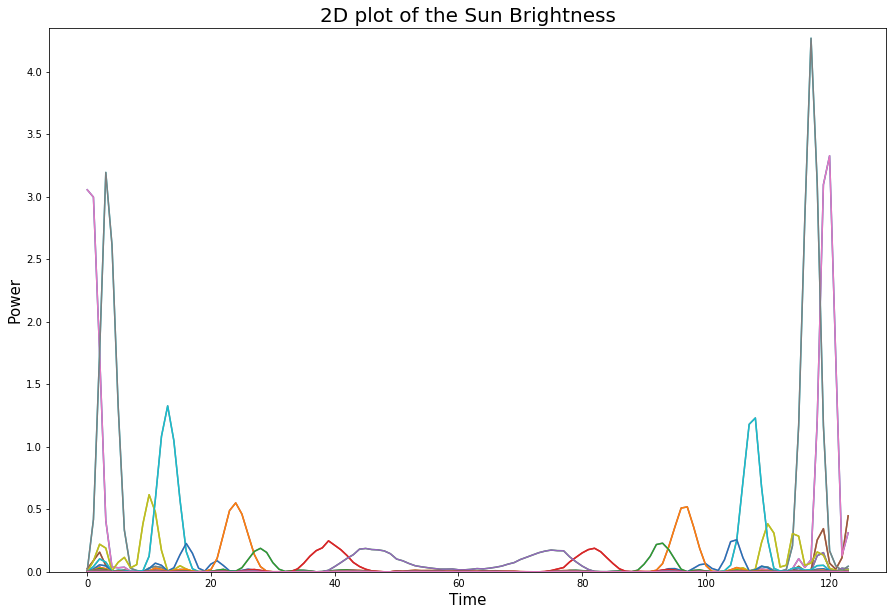

In [12]:
plt.figure(figsize=(15,10))
plt.plot(psun)
plt.title('2D plot of the Sun Brightness',fontsize = 20)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Power', fontsize = 15)
plt.ylim(0,4.35)
plt.show()

In [223]:
volt_moon = np.load('moonVolt_last.npz')['vv']
time_moon = np.load('moonVolt_last.npz')['ttt']
time_newmoon = time_moon[:-5000] - time_moon[0]
volt_newmoon =volt_moon[:-5000] - np.mean(volt_moon[:-5000])

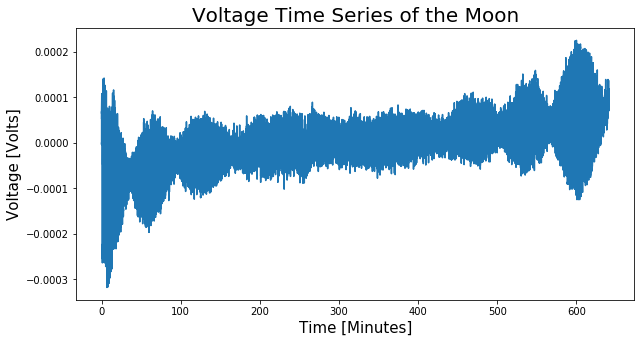

In [224]:
plt.figure(figsize=(10,5))
plt.plot(time_newmoon/60,volt_newmoon)
plt.title('Voltage Time Series of the Moon',fontsize=20)
plt.xlabel('Time [Minutes]',fontsize=15)
plt.ylabel('Voltage [Volts]',fontsize=15)
plt.show()

In [225]:

Total_rec = 10*60
print(Total_rec, "Minutes of recording")
print(len(volt_newmoon), 'Total size of Moon Data ')
moon_dpm = len(volt_newmoon)/Total_rec
print(moon_dpm, "Data per minute")
Interval5 = moon_dpm*5
print(Interval5, "data every 5 minutes")
Remainder_data = len(volt_newmoon)%1206
print(Remainder_data, "leftover for 5 minutes")
r_moon = volt_newmoon[:-Remainder_data]
print(r_moon.shape)

(600, 'Minutes of recording')
(153856, 'Total size of Moon Data ')
(256, 'Data per minute')
(1280, 'data every 5 minutes')
(694, 'leftover for 5 minutes')
(153162,)


In [226]:
pmoon = np.array([])
for i in np.arange(125):
    moon_slices = r_moon[1200*i:1200*(i+1)]
    prmoon = np.abs(np.fft.fft(moon_slices))**2
    if i == 0:
        pmoon = np.append(pmoon, np.fft.fftshift(prmoon))
    else: 
        pmoon = np.vstack((pmoon, np.fft.fftshift(prmoon)))

(125, 1200)


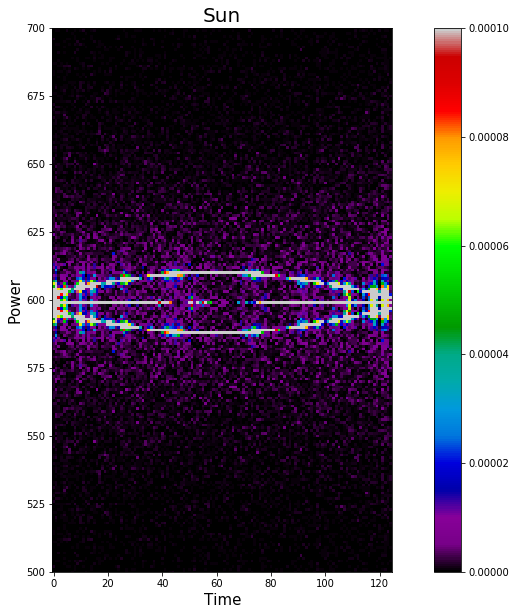

In [227]:
print(pmoon.shape)
plt.figure(figsize=(15,10))
plt.imshow(np.rot90(pmoon), cmap='hot', clim=(0,0.0001)).set_cmap('nipy_spectral')
plt.ylim(500,700)
plt.title('Sun',fontsize = 20)
plt.xlabel('Time',fontsize = 15)
plt.ylabel('Power', fontsize = 15)
plt.colorbar()
plt.show()

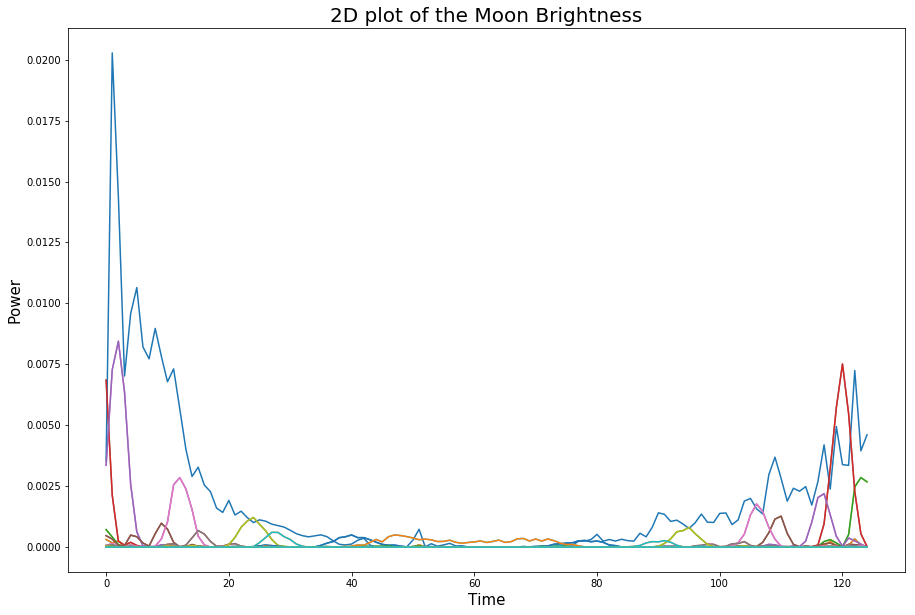

In [228]:
plt.figure(figsize=(15,10))
plt.plot(pmoon)
plt.title('2D plot of the Moon Brightness',fontsize = 20)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Power', fontsize = 15)
plt.show()

# The Local Fringe Frequency 



In [19]:
Sununix = np.genfromtxt('Sun_coord',usecols = 0)[1:]

In [20]:
Sun_westAl = np.genfromtxt('Sun_coord',usecols = 5)[1:]

In [21]:
Sun_westAz = np.genfromtxt('Sun_coord',usecols = 6)[1:]

In [22]:
Sun_eastAl = np.genfromtxt('Sun_coord',usecols = 7)[1:]

In [23]:
Sun_eastAz = np.genfromtxt('Sun_coord',usecols = 8)[1:]

In [24]:
Sun_Al = (Sun_westAl + Sun_eastAl)/2
Sun_Az = (Sun_eastAz + Sun_eastAz)/2

Local Fringe Frequency
\begin{equation}
f_{f} = [\frac{B_{ew}}{\lambda}cos(\delta)]cos(h_{s,0}) - [\frac{B_{ns}}{\lambda}sin(L)cos(\delta)]sin(h_{s,0}), 
\end{equation}

where $B_{ew}$ is the east-west component of the baseline, $B_{ns}$ is the north-south component of the baseline, $h_{s,0}$ is the current hour angle of the source, $\lambda$ is the wavelength, L is the equatorial latitude, and $\delta$ is the declination 

In [25]:
Bew = 15 # Estimate value of East-West Baseline is 20 meters from lab manual 
lam = 2.5e-2 # Incoming wavelength of 2.5cm 
Bns = 0 # Estimate value of North-South Baseline is 0 meters from lab manual 

Fringe_max = ((Bew-Bns)/lam) # in cycles per radian 

fringe_max = Fringe_max*(2*np.pi/(24*3600))
print(str(fringe_max) + ' cycles per second is the maximum local fringe frequency')
print(str(round(fringe_max*1000,1)) + " mHz is the max fringe frequency with our given assumptions.")

0.0436332312999 cycles per second is the maximum local fringe frequency
43.6 mHz is the max fringe frequency with our given assumptions.


### Fourier Filtering for the Cas A 

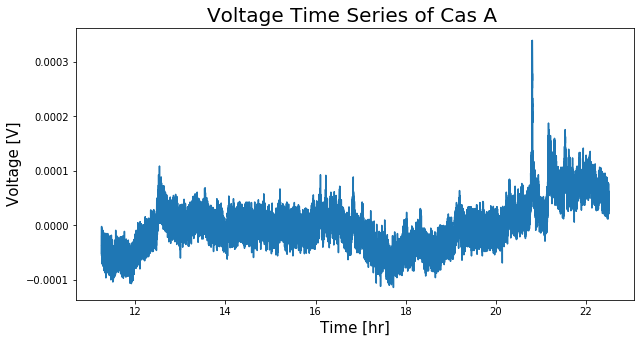

In [26]:
plt.figure(figsize=(10,5))
#plt.plot((cas_timez-cas_timez[0])/3600,cas_voltz-np.mean(cas_voltz))
plt.plot(cas_new_timez/3600,cas_new_voltz)
plt.xlabel('Time [hr]',fontsize = 15)
plt.ylabel('Voltage [V]',fontsize=15)
plt.title('Voltage Time Series of Cas A ',fontsize = 20)
plt.show()

In [27]:
Fourier_cas = np.fft.fft(cas_new_voltz)
Freq_cas = np.fft.fftfreq(len(cas_new_voltz),d=0.5)


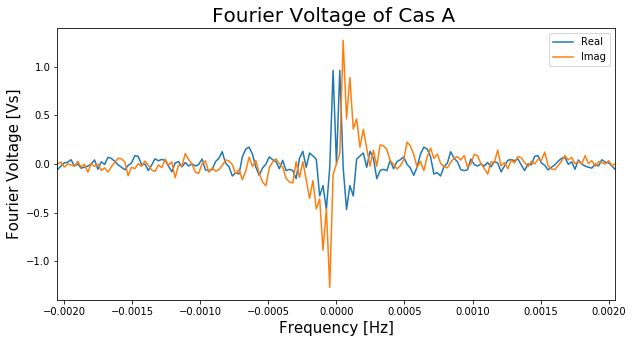

In [28]:
plt.figure(figsize=(10,5))
plt.plot(np.fft.fftshift(Freq_cas),np.fft.fftshift(Fourier_cas.real))
plt.plot(np.fft.fftshift(Freq_cas),np.fft.fftshift(Fourier_cas.imag))
plt.title('Fourier Voltage of Cas A ',fontsize = 20)
plt.xlabel('Frequency [Hz]',fontsize = 15)
plt.ylabel('Fourier Voltage [Vs]',fontsize =15)
plt.legend(['Real','Imag'],loc='upper right')
plt.xlim(-0.00205,0.00205)
plt.show()

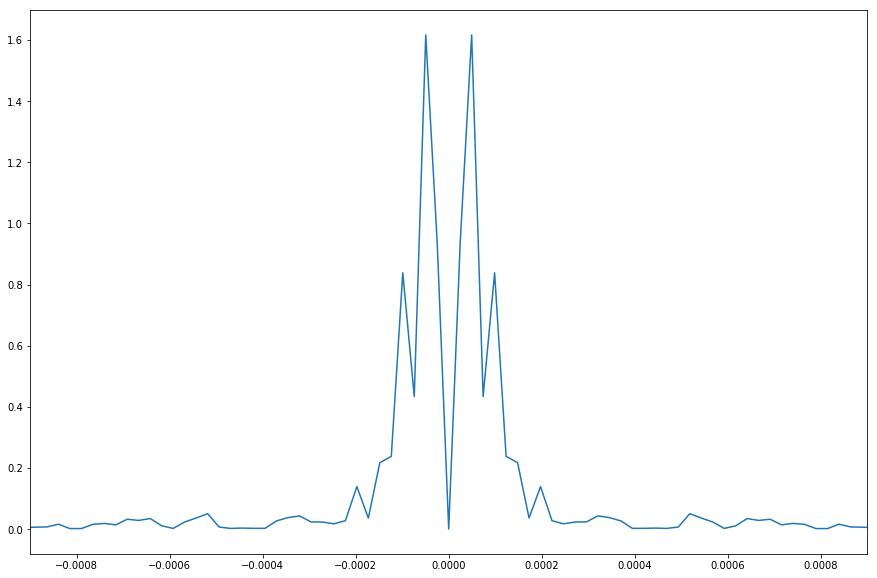

In [29]:
Power_cas = np.abs(Fourier_cas)**2
plt.figure(figsize=(15,10))
plt.plot(np.fft.fftshift(Freq_cas),np.fft.fftshift(Power_cas))
plt.xlim(-0.0009,0.0009)
plt.show()

c:\python27\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


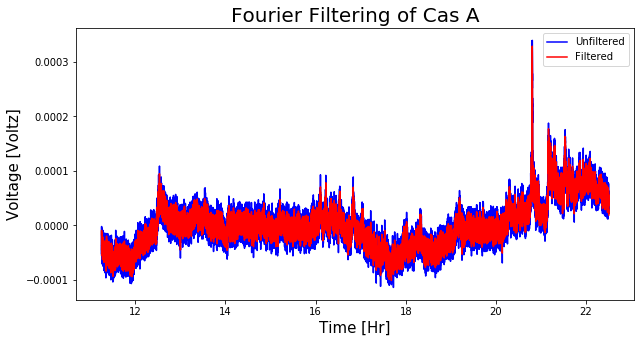

In [30]:
cut_cas_signal = Fourier_cas.copy()
cut_cas_signal[(Freq_cas>fringe_max)] = 0
cut_cassig = np.fft.ifft(cut_cas_signal)
plt.figure(figsize=(10,5))
plt.plot(cas_new_timez/3600,cas_new_voltz,'b')
plt.plot(cas_new_timez/3600,cut_cassig,'r')
plt.title('Fourier Filtering of Cas A',fontsize = 20)
plt.xlabel('Time [Hr]',fontsize = 15)
plt.ylabel('Voltage [Voltz]',fontsize = 15)
plt.legend(['Unfiltered','Filtered'],loc='upper right')
plt.show()

### Fourier Filtering for the Sun

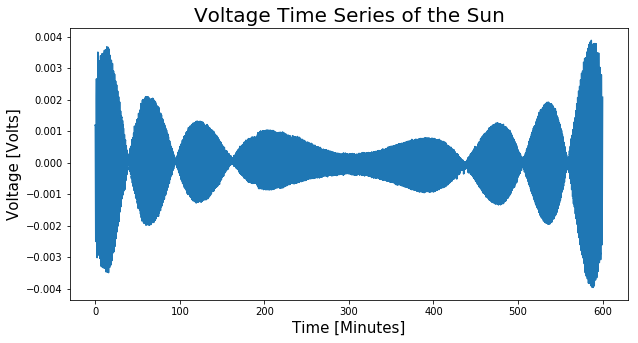

In [31]:
plt.figure(figsize=(10,5))
plt.plot(time_newsun/60,volt_newsun)
plt.title('Voltage Time Series of the Sun',fontsize=20)
plt.xlabel('Time [Minutes]',fontsize=15)
plt.ylabel('Voltage [Volts]',fontsize=15)
plt.show()

In [32]:
Fourier_sun = np.fft.fft(volt_newsun)
Freq_sun = np.fft.fftfreq(len(volt_newsun),d=0.5)


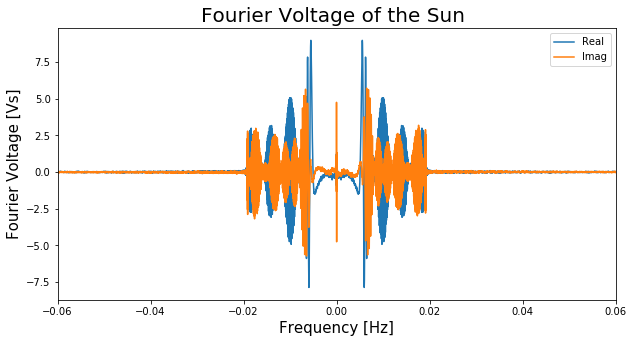

In [33]:
plt.figure(figsize=(10,5))
plt.plot(np.fft.fftshift(Freq_sun),np.fft.fftshift(Fourier_sun.real))
plt.plot(np.fft.fftshift(Freq_sun),np.fft.fftshift(Fourier_sun.imag))
plt.title('Fourier Voltage of the Sun ',fontsize = 20)
plt.xlabel('Frequency [Hz]',fontsize = 15)
plt.ylabel('Fourier Voltage [Vs]',fontsize =15)
plt.legend(['Real','Imag'],loc='upper right')
plt.xlim(-0.06,0.06)
plt.show()

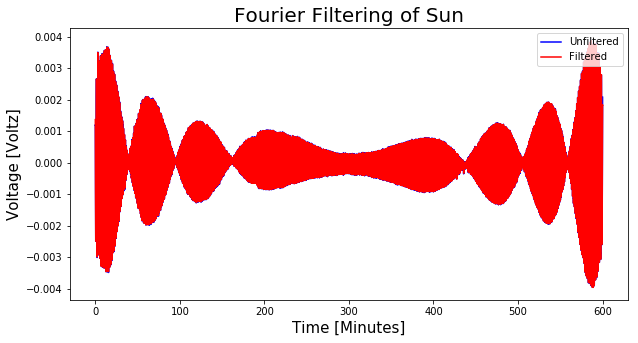

In [34]:
cut_sun_signal = Fourier_sun.copy()
cut_sun_signal[(Freq_sun>fringe_max)] = 0
cut_sunsig = np.fft.ifft(cut_sun_signal)
plt.figure(figsize=(10,5))
plt.plot(time_newsun/60,volt_newsun,'b')
plt.plot(time_newsun/60,cut_sunsig,'r')
plt.title('Fourier Filtering of Sun',fontsize = 20)
plt.xlabel('Time [Minutes]',fontsize = 15)
plt.ylabel('Voltage [Voltz]',fontsize = 15)
plt.legend(['Unfiltered','Filtered'],loc='upper right')
plt.show()

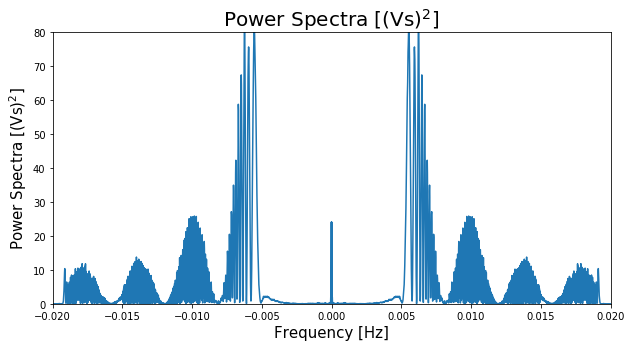

In [35]:
Power_sun = np.abs(np.fft.fft(cut_sunsig))**2
Freq_sun = np.fft.fftfreq(len(cut_sunsig),d=0.5)
plt.figure(figsize=(10,5))
plt.plot(np.fft.fftshift(Freq_sun),np.fft.fftshift(Power_sun))
plt.title('Power Spectra [(Vs)$^2$]',fontsize = 20)
plt.xlim(-0.02,0.02)
plt.ylim(0,80)
plt.xlabel('Frequency [Hz]',fontsize = 15)
plt.ylabel('Power Spectra [(Vs)$^2$]',fontsize = 15)
plt.show()

### Fourier Filtering for the Moon

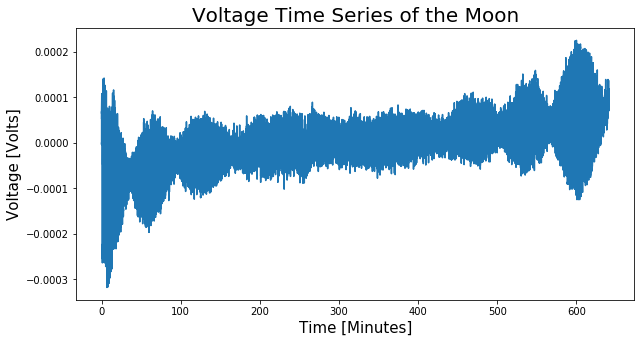

In [229]:
plt.figure(figsize=(10,5))
plt.plot(time_newmoon/60,volt_newmoon)
plt.title('Voltage Time Series of the Moon',fontsize=20)
plt.xlabel('Time [Minutes]',fontsize=15)
plt.ylabel('Voltage [Volts]',fontsize=15)
plt.show()

In [230]:
Fourier_moon = np.fft.fft(volt_newmoon)
Freq_moon = np.fft.fftfreq(len(volt_newmoon),d=0.5)


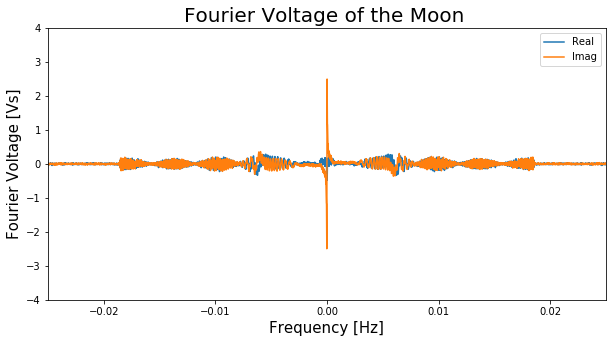

In [232]:
plt.figure(figsize=(10,5))
plt.plot(np.fft.fftshift(Freq_moon),np.fft.fftshift(Fourier_moon.real))
plt.plot(np.fft.fftshift(Freq_moon),np.fft.fftshift(Fourier_moon.imag))
plt.title('Fourier Voltage of the Moon ',fontsize = 20)
plt.xlabel('Frequency [Hz]',fontsize = 15)
plt.ylabel('Fourier Voltage [Vs]',fontsize =15)
plt.legend(['Real','Imag'],loc='upper right')
plt.xlim(-0.025,0.025)
plt.ylim(-4,4)
plt.show()

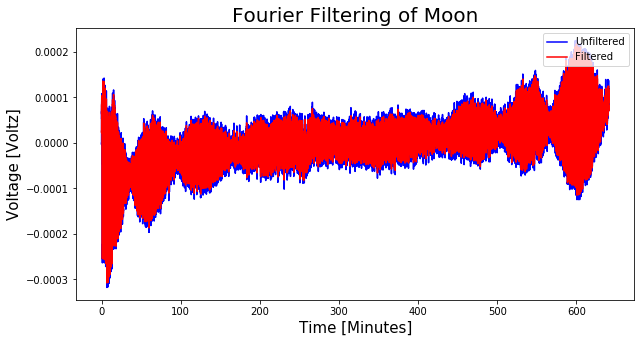

In [233]:
cut_moon_signal = Fourier_moon.copy()
cut_moon_signal[(Freq_moon>fringe_max)] = 0
cut_moonsig = np.fft.ifft(cut_moon_signal)
plt.figure(figsize=(10,5))
plt.plot(time_newmoon/60,volt_newmoon,'b')
plt.plot(time_newmoon/60,cut_moonsig,'r')
plt.title('Fourier Filtering of Moon',fontsize = 20)
plt.xlabel('Time [Minutes]',fontsize = 15)
plt.ylabel('Voltage [Voltz]',fontsize = 15)
plt.legend(['Unfiltered','Filtered'],loc='upper right')
plt.show()

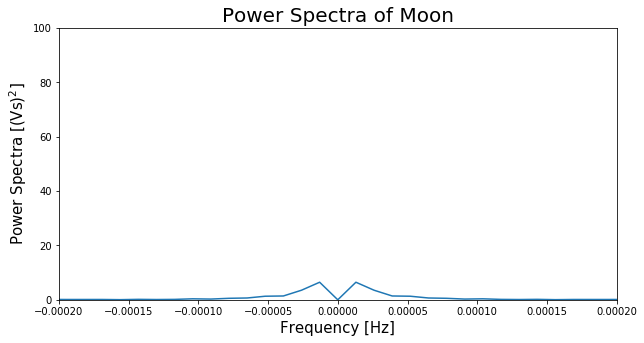

In [234]:
Power_moon = np.abs(np.fft.fft(cut_moonsig))**2
Freq_moon = np.fft.fftfreq(len(cut_moonsig),d=0.5)
plt.figure(figsize=(10,5))
plt.title('Power Spectra of Moon',fontsize = 20)
plt.plot(np.fft.fftshift(Freq_moon),np.fft.fftshift(Power_moon))
plt.xlim(-0.0002,0.0002)
plt.ylim(0,100)
plt.xlabel('Frequency [Hz]',fontsize = 15)
plt.ylabel('Power Spectra [(Vs)$^2$]',fontsize = 15)
plt.show()

In [41]:
def convert_az_alt_to_ha_dec(az,alt,phi=37.871853):
    x0 = np.cos(np.radians(alt))*np.cos(np.radians(az))
    x1 = np.cos(np.radians(alt))*np.sin(np.radians(az))
    x2 = np.sin(np.radians(alt))

    R = np.matrix([[-np.sin(np.radians(phi)),0,np.cos(np.radians(phi))],[0,-1,0],[np.cos(np.radians(phi)),0,np.sin(np.radians(phi))]])

    x = np.matrix([[x0],[x1],[x2]])

    xp = np.dot(np.transpose(R),x)

    ha = float(np.degrees(np.arctan2(xp[1],xp[0]))) 
    dec = float(np.degrees(np.arcsin(xp[2]))) 

    return ha, dec

In [68]:
sun_coord = np.load('SUNcoord_ALAZ.npz')
cas_coord = np.load('cas_AlAz.npy')

In [71]:
sun_AZ = sun_coord['arr_1']
sun_AL = sun_coord['arr_0']

In [216]:
moon_coord = np.load('MOONcoord_ALAZ.npz')
moon_AZ = moon_coord['arr_1']
moon_AL = moon_coord['arr_0']

In [43]:
cas_coord = cas_coord[int(len(cas_coord)/2):]

In [45]:
cas_AZ = []
cas_AL = []
for i in  range(int(len(cas_coord))):
    Al = cas_coord[i][0][0]
    Az = cas_coord[i][0][1]
    cas_AZ.append(Az)
    cas_AL.append(Al)
    

In [72]:
Bew = 20 
lamda = 2.5e-2
L = 37.871853

ha_sun = []
dec_sun = []
for i,j in zip(sun_AZ, sun_AL):
    has, decs = convert_az_alt_to_ha_dec(i,j)
    ha_sun.append(has)
    dec_sun.append(decs)
    
ha_sun = np.asarray(ha_sun)
dec_sun = np.asarray(dec_sun)

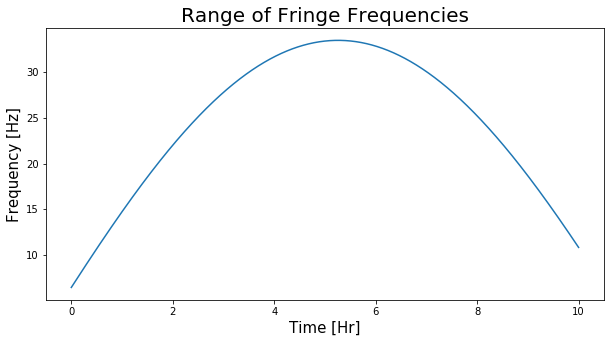

In [73]:
f_fringe = ((Bew*np.cos(np.radians(dec_sun))/lamda)*np.cos(np.radians(ha_sun)))*(2*np.pi/3600*24) 
f_fringe
plt.figure(figsize=(10,5))
plt.plot(time_newsun/3600,f_fringe[:-5000])
plt.title('Range of Fringe Frequencies',fontsize = 20)
plt.xlabel('Time [Hr]',fontsize = 15)
plt.ylabel('Frequency [Hz]',fontsize = 15)
plt.show()

In [48]:
Bew = 15
lamda = 2.5e-2
L = 37.871853

ha_cas = []
dec_cas = []
for i,j in zip(cas_AZ, cas_AL):
    has, decs = convert_az_alt_to_ha_dec(i,j)
    ha_cas.append(has)
    dec_cas.append(decs)
    
ha_cas = np.asarray(ha_cas)
dec_cas = np.asarray(dec_cas)

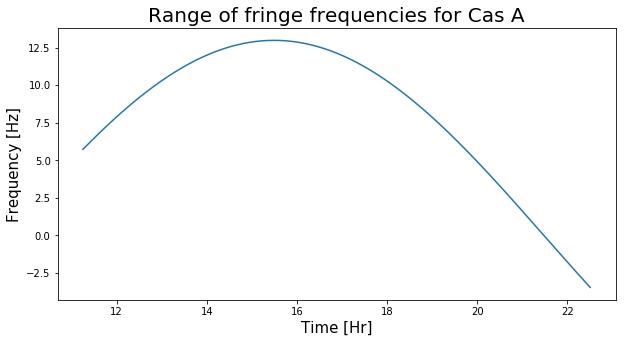

In [49]:
f_fringe = ((Bew*np.cos(np.radians(dec_cas))/lamda)*np.cos(np.radians(ha_cas)))*(2*np.pi/3600*24) 
plt.figure(figsize=(10,5))
plt.plot(cas_new_timez/3600,f_fringe)
plt.title('Range of fringe frequencies for Cas A',fontsize=20)
plt.xlabel('Time [Hr]',fontsize= 15)
plt.ylabel('Frequency [Hz]',fontsize =15)
plt.show()

In [217]:
Bew = 20 
lamda = 2.5e-2
L = 37.871853

ha_moon = []
dec_moon = []
for i,j in zip(moon_AZ, moon_AL):
    has, decs = convert_az_alt_to_ha_dec(i,j)
    ha_moon.append(has)
    dec_moon.append(decs)
    
ha_moon = np.asarray(ha_moon)
dec_moon = np.asarray(dec_moon)

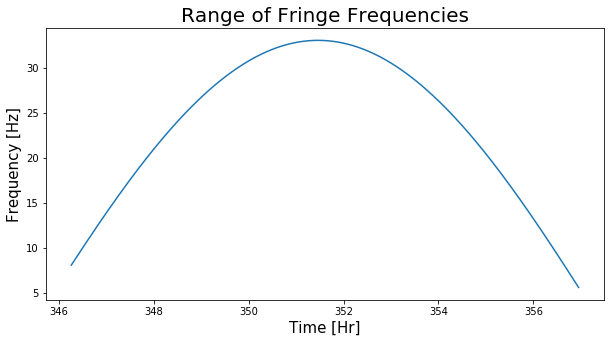

In [218]:
f_fringe = ((Bew*np.cos(np.radians(dec_moon))/lamda)*np.cos(np.radians(ha_moon)))*(2*np.pi/3600*24) 
f_fringe
plt.figure(figsize=(10,5))
plt.plot(time_newmoon/3600,f_fringe[:-5000])
plt.title('Range of Fringe Frequencies',fontsize = 20)
plt.xlabel('Time [Hr]',fontsize = 15)
plt.ylabel('Frequency [Hz]',fontsize = 15)
plt.show()

# Least Squares Fitting the Fringe to the baselines and/or the Declination

## Fringe Amplitude for a point source

\begin{equation}
F(h_{s}) = Acos(2\pi\nu\tau_{g}') + Bsin(2\pi\nu\tau_{g}'),
\end{equation}

\begin{equation}
\nu\tau_{g}'(B_{ew},B_{ns},\delta, h_{s}) = [\frac{B_{ew}}{\lambda}cos(\delta)]sin(h_{s}) + [\frac{B_{ns}}{\lambda}sin(L)cos(\delta)]cos(h_{s}),
\end{equation}

\begin{equation}
A = cos(2\pi\nu\tau_{c}), \space B = -sin(2\pi\nu\tau_{c}),
\end{equation}

where L is the equatorial Latitude of the interferometer, $h_{s}$ is the hour angle of the point source, $\delta$ is the declination of the point source, $B_{ew}$ is the East-West Baseline component, $B_{ns}$ is the North-South Baseline component, $\nu\tau_{g}'$ is a function of the $B_{ew}$, $B_{ns}, $\delta$, and $h_{s}$, $\tau_{g}'$ is the geometric delay, $\tau_{c} is the the relative delay in cable length, and A, B defined coefficients as a function of $\tau_{c}$.



### The Brute Force Technique 

Assume for now $B_{ns}$ = 0. We want to solve for $Q_{ew}$ and $Q_{ns}$ using Least squares fitting such that $Q_{ew}$ = $\frac{B_{ew}}{\lambda}$cos($\delta$) and $Q_{ns}$ = $\frac{B_{ns}}{\lambda}$sin(L)cos($\delta$). 

First need to make an educated guess for $Q_{ew}$ and assume the declination is somewhat constant. 

In [50]:
casBew = np.linspace(14,18,1000)
casBns = 0
lam = 2.5e-2
delta = dec_cas[0]
L = 37.871853

casQew = (casBew/lam)*np.cos(np.radians(delta))
casQns = (casBns/lam)*np.sin(np.radians(L))*np.cos(np.radians(delta))

In [51]:
Sum_res_EW = []
for i in range(int(len(casQew))):
   
    hs = ha_cas
    nu_tau = casQew[i]*np.sin(np.radians(hs)) + casQns*np.cos(np.radians(hs))

    X1 = np.cos(2*np.pi*nu_tau)
    X2 = np.sin(2*np.pi*nu_tau)
    F = cas_new_voltz

    X = np.matrix([[X1[i],X2[i]] for i in range(len(X1))])
    Y = np.matrix([[F[i]] for i in range(len(X1))])
   

    alpha = np.dot(X.T,X)
    beta = np.dot(X.T,Y)

    alpha_inv = np.linalg.inv(alpha)

    a = np.dot(alpha_inv,beta)

    A = float(a[0])
    B = float(a[1])
    ybar = np.dot(X,a)   #estiamted values of voltages from model
    dely = Y - ybar      #Residuals

    s_sq = np.dot(dely.T,dely)/(len(F)-len(a))

    diag_inva = np.diag(alpha_inv)

    vardc = s_sq*diag_inva
    dc = np.diag(alpha_inv)

    ncov = alpha_inv/(np.sqrt(np.outer(dc,dc)))
    dely = np.asarray(dely)
    S = np.sum(dely**2)
    Sum_res_EW.append(S)

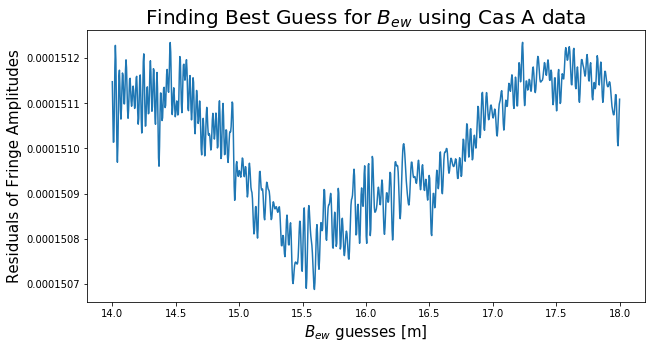

In [52]:
plt.figure(figsize=(10,5))
plt.plot(casBew,Sum_res_EW)
plt.title('Finding Best Guess for $B_{ew}$ using Cas A data',fontsize=20)
plt.ylabel('Residuals of Fringe Amplitudes',fontsize = 15)
plt.xlabel('$B_{ew}$ guesses [m]',fontsize=15)
plt.show()

In [53]:
for i in range(int(len(Sum_res_EW))):
    if Sum_res_EW[i] == min(Sum_res_EW):
        print(i)

398


In [54]:
print('The best guess for East-West Baseline is ' + str(round(casBew[398],1)) + ' meters.')


The best guess for East-West Baseline is 15.6 meters.


In [74]:
sunBew = np.linspace(14,18,10)
sunBns = 0
lam = 2.5e-2
delta = dec_sun[0]
L = 37.871853

sunQew = (sunBew/lam)*np.cos(np.radians(delta))
sunQns = (sunBns/lam)*np.sin(np.radians(L))*np.cos(np.radians(delta))

In [75]:
Sum_resun_EW = []
for i in range(int(len(sunQew))):
   
    hs = ha_sun[:-5000]
    nu_tau = sunQew[i]*np.sin(np.radians(hs)) + sunQns*np.cos(np.radians(hs))

    X1 = np.cos(2*np.pi*nu_tau)
    X2 = np.sin(2*np.pi*nu_tau)
    F = volt_newsun

    X = np.matrix([[X1[i],X2[i]] for i in range(len(X1))])
    Y = np.matrix([[F[i]] for i in range(len(X1))])
   

    alpha = np.dot(X.T,X)
    beta = np.dot(X.T,Y)

    alpha_inv = np.linalg.inv(alpha)

    a = np.dot(alpha_inv,beta)

    A = float(a[0])
    B = float(a[1])
    ybar = np.dot(X,a)   #estiamted values of voltages from model
    dely = Y - ybar      #Residuals

    s_sq = np.dot(dely.T,dely)/(len(F)-len(a))

    diag_inva = np.diag(alpha_inv)

    vardc = s_sq*diag_inva
    dc = np.diag(alpha_inv)

    ncov = alpha_inv/(np.sqrt(np.outer(dc,dc)))
    dely = np.asarray(dely)
    S = np.sum(dely**2)
    Sum_resun_EW.append(S)


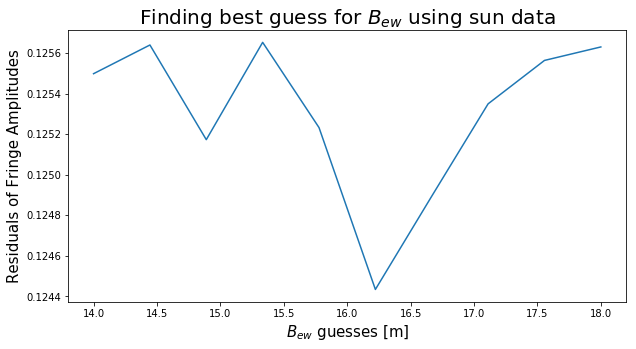

In [76]:
plt.figure(figsize=(10,5))
plt.plot(sunBew,Sum_resun_EW)
plt.title('Finding best guess for $B_{ew}$ using sun data', fontsize = 20)
plt.ylabel('Residuals of Fringe Amplitudes',fontsize = 15)
plt.xlabel('$B_{ew}$ guesses [m]',fontsize = 15)
plt.show()

In [77]:
for i in range(int(len(Sum_resun_EW))):
    if Sum_resun_EW[i] == min(Sum_resun_EW):
        print(i)

5


In [79]:
print('The best guess for East-West Baseline is ' + str(round(sunBew[5],1)) +' meters.')

The best guess for East-West Baseline is 16.2 meters.


In [237]:
moonBew = np.linspace(14,18,10)
moonBns = 0
lam = 2.5e-2
delta = np.mean(dec_moon[:-5000])
L = 37.871853

moonQew = (moonBew/lam)*np.cos(np.radians(delta))
moonQns = (moonBns/lam)*np.sin(np.radians(L))*np.cos(np.radians(delta))

In [239]:
Sum_remoon_EW = []
for i in range(int(len(moonQew))):
   
    hs = ha_moon[:-5000]
    nu_tau = moonQew[i]*np.sin(np.radians(hs)) + moonQns*np.cos(np.radians(hs))

    X1 = np.cos(2*np.pi*nu_tau)
    X2 = np.sin(2*np.pi*nu_tau)
    F = volt_newmoon

    X = np.matrix([[X1[i],X2[i]] for i in range(len(X1))])
    Y = np.matrix([[F[i]] for i in range(len(X1))])
   

    alpha = np.dot(X.T,X)
    beta = np.dot(X.T,Y)

    alpha_inv = np.linalg.inv(alpha)

    a = np.dot(alpha_inv,beta)

    A = float(a[0])
    B = float(a[1])
    ybar = np.dot(X,a)   #estiamted values of voltages from model
    dely = Y - ybar      #Residuals

    s_sq = np.dot(dely.T,dely)/(len(F)-len(a))

    diag_inva = np.diag(alpha_inv)

    vardc = s_sq*diag_inva
    dc = np.diag(alpha_inv)

    ncov = alpha_inv/(np.sqrt(np.outer(dc,dc)))
    dely = np.asarray(dely)
    S = np.sum(dely**2)
    Sum_remoon_EW.append(S)


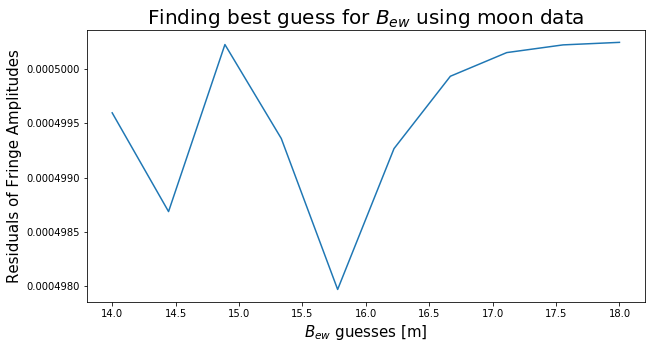

In [240]:
plt.figure(figsize=(10,5))
plt.plot(moonBew,Sum_remoon_EW)
plt.title('Finding best guess for $B_{ew}$ using moon data', fontsize = 20)
plt.ylabel('Residuals of Fringe Amplitudes',fontsize = 15)
plt.xlabel('$B_{ew}$ guesses [m]',fontsize = 15)
plt.show()

In [241]:
for i in range(int(len(Sum_remoon_EW))):
    if Sum_remoon_EW[i] == min(Sum_remoon_EW):
        print(i)

4


In [242]:
print('The best guess for East-West Baseline is ' + str(round(moonBew[4],1)) +' meters.')

The best guess for East-West Baseline is 15.8 meters.


## Now we need do the same for $Q_{ns}$!!!!

In [580]:
n = 50
casBew = np.linspace(14,16,n)
casBns = np.linspace(0,1,n)
lam = 2.5e-2
delta = np.mean(dec_cas)
L = 37.871853
hs = ha_cas


CASQew = (casBew/lam)*np.cos(np.radians(delta))
CASQns = (casBns/lam)*np.sin(np.radians(L))*np.cos(np.radians(delta))
yee = np.sin(np.radians(hs))
yit = np.cos(np.radians(hs))

In [581]:
rescas = []
Acas = []
Bcas = []
Scas = []
for i in range(int(len(CASQew))):
    swag = CASQew[i]
    for k in range(int(len(CASQns))):
        nu_tau = swag*yee + CASQns[k]*yit

        X1 = np.cos(2*np.pi*nu_tau)
        X2 = np.sin(2*np.pi*nu_tau)
        F = cas_new_voltz

        X = np.matrix([[X1[i],X2[i]] for i in range(len(X1))])
        Y = np.matrix([[F[i]] for i in range(len(X1))])


        alpha = np.dot(X.T,X)
        beta = np.dot(X.T,Y)

        alpha_inv = np.linalg.inv(alpha)

        a = np.dot(alpha_inv,beta)

        A = float(a[0])
        B = float(a[1])
        ybar = np.dot(X,a)   #estiamted values of voltages from model
        dely = Y - ybar      #Residuals

        s_sq = np.dot(dely.T,dely)/(len(F)-len(a))

        diag_inva = np.diag(alpha_inv)

        vardc = s_sq*diag_inva
        dc = np.diag(alpha_inv)

        ncov = alpha_inv/(np.sqrt(np.outer(dc,dc)))
        dely = np.asarray(dely)
        S = np.sum(dely**2)
        rescas.append(S)
        Acas.append(A)
        Bcas.append(B)
        Scas.append(s_sq)


In [582]:
rescas = np.asarray(rescas)
rescass = rescas.reshape(n,n)


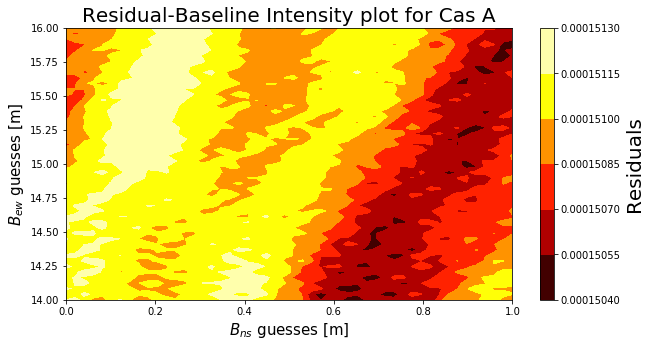

2349
The global minimum from our Cas A data corresponds to a minimum residual of 0.00015040440513520124 at the point( 1.0 meters, 15.877551020408163 meters). The coefficients of A and B are 4.60882823308e-06 1.47301972693e-06. The variance at this global minimum [[1.85652363e-09]]


In [583]:
plt.figure(figsize=(10,5))
plt.title('Residual-Baseline Intensity plot for Cas A',fontsize =20)
plt.xlabel('$B_{ns}$ guesses [m]',fontsize = 15)
plt.ylabel('$B_{ew}$ guesses [m]',fontsize = 15)
plt.contourf(casBns,casBew,rescass,cmap='hot')
cbar = plt.colorbar()
cbar.set_label('Residuals',fontsize = 20)

# plt.xlim(0.8,0.9)
# plt.ylim(15,15.2)
plt.show()


BEW = []
BNS = []
for i in range(int(len(casBew))):
    swag = casBew[i]
    for k in range(int(len(casBew))):
        BEW.append(swag)
    for l in range(int(len(casBns))):
        BNS.append(casBns[l])
zcas = []
BCAS = np.asarray(zip(BEW,BNS,rescas))
for i in range(int(len(rescas))):
    if rescas[i] == min(rescas):
        print(i)
        zcas.append(i)


        
print('The global minimum from our Cas A data corresponds to a minimum residual of ' + str(BCAS[zcas[0]][2]) +' at the point' + '( ' + 
      str(BCAS[zcas[0]][1]) + ' meters, ' + str(BCAS[zcas[0]][0]) + ' meters).' + ' The coefficients of A and B are ' + str(Acas[zcas[0]]) + ' ' +
     str(Bcas[zcas[0]]) + '. The variance at this global minimum ' + str(Scas[zcas[0]]) )


### The next few cells involve numerically differentiating the contour plot displayed above inorder to obtain our [$\alpha$] matrix that has matrix elements of second order derivatives evaluated at the global minimum in our contour plot. 

In [584]:
def first_derivative(x,y):
    # we need to specify the size of dy ahead because diff returns
# an array of n-1 elements
    dy = zeros(y.shape,float) # we know it will be this size
    dy[0:-1] = diff(y)/np.diff(x)
    dy[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])
    
    return dy


In [585]:
Bcas_slice = []
for i in range(n):
    slices = BCAS[n*i:n*(i+1)]
    Bcas_slice.append(slices)

In [586]:
Y = []
for i in range(len(Bcas_slice)):
    for k in range(len(Bcas_slice)):
        y = Bcas_slice[k][i][2]
        Y.append(y)
Y = np.asarray(Y)
Ynew = np.asarray(Y).reshape(n,n)


In [587]:
bEW = []
bNS = []
for i in range(int(len(casBns))):
    swag = casBns[i]
    for k in range(int(len(casBns))):
        bEW.append(swag)
    for l in range(int(len(casBew))):
        bNS.append(casBew[l])
Zcas = []
bCAS = np.asarray(zip(bEW,bNS,Y))
for i in range(int(len(Y))):
    if Y[i] == min(Y):
        print(i)
        Zcas.append(i)        


2496


In [588]:
DS_dQew = []
for i in range(len(Ynew)):
    Dy_dy = first_derivative(casBew,Ynew[i])
    DS_dQew.append(Dy_dy)
DS_dQew = np.asarray(DS_dQew)

DS2_dQew2 = [] ### this is finding the second derivative of our contour with respect to Qew 
for l in range(len(DS_dQew)):
    Dy2_dy2 = first_derivative(casBew,DS_dQew[l])
    DS2_dQew2.append(Dy2_dy2)
DS2_dQew2 = np.asarray(DS2_dQew2)
alpha_11 = 0.5*DS2_dQew2.reshape(n**2,1)[Zcas[0]]*(lam/np.cos(np.radians(delta)))
print(alpha_11)

DS2_dQewdQns = []### this is finding the second derivative of our contour with respect to Qew and then Qns
for l in range(len(DS_dQew)):
    Dy2_dy2 = first_derivative(casBns,DS_dQew[l])
    DS2_dQewdQns.append(Dy2_dy2)
DS2_dQewdQns = np.asarray(DS2_dQewdQns)
alpha_12 = 0.5*DS2_dQewdQns.reshape(n**2,1)[Zcas[0]]*((lam)**2)/(((np.cos(np.radians(delta)))**2)*np.sin(np.radians(L)))
print(alpha_12)



[-2.45420277e-06]
[-3.87109102e-07]


In [589]:
DS_dQns = []
for i in range(len(rescass)):
    Dy_dx = first_derivative(casBns,rescass[i])
    DS_dQns.append(Dy_dx)
DS_dQns = np.asarray(DS_dQns)

DS2_dQns2 = []
for l in range(len(DS_dQns)):
    Dy2_dx2 = first_derivative(casBns,DS_dQns[l])
    DS2_dQns2.append(Dy2_dx2)
DS2_dQns2 = np.asarray(DS2_dQns2)
alpha_22 = 0.5*DS2_dQns2.reshape(n**2,1)[Zcas[0]]
alpha_22*(lam/(np.cos(np.radians(delta))*np.sin(np.radians(L))))

array([-4.36965089e-06])

In [622]:
alphas = np.matrix([[float(alpha_11),float(alpha_12)],[float(alpha_12),float(alpha_22)]])
gg = np.linalg.inv(alphas)
vardc= Scas[zcas[0]]*np.diag(np.abs(gg))
casvar =  np.asarray(np.sqrt(vardc))
print('The uncertainty for the EW baseline is ' + str(casvar[0][0]) + ' meters and the uncertainty for the NS baseline is ' + str(casvar[0][1]) + 'meters using the cas data. ')

The uncertainty for the EW baseline is 0.0012226601072655528 meters and the uncertainty for the NS baseline is 0.00028360184395454863meters using the cas data. 


In [591]:
lam = 2.5e-2
Fcas = Acas[zcas[0]]*np.cos(np.radians(2*np.pi*(BCAS[zcas[0]][0]/lam)*np.cos(np.radians(delta))*np.cos(np.radians(ha_cas)))) + Bcas[zcas[0]]*np.sin(np.radians(2*np.pi*(BCAS[zcas[0]][0]/lam)*np.sin(np.radians(L))*np.cos(np.radians(delta))*np.cos(np.radians(ha_cas)))) 

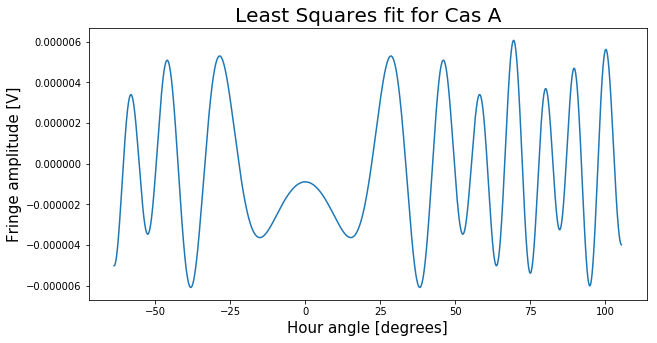

In [592]:
plt.figure(figsize=(10,5))
plt.plot(ha_cas,Fcas)
plt.title('Least Squares fit for Cas A',fontsize = 20)
plt.xlabel('Hour angle [degrees]',fontsize = 15)
plt.ylabel('Fringe amplitude [V]',fontsize = 15)
plt.show()

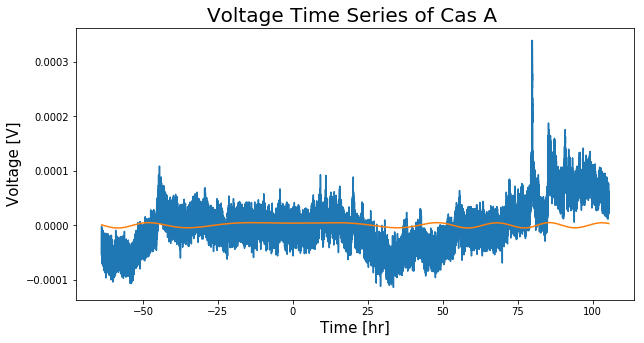

In [537]:
plt.figure(figsize=(10,5))
#plt.plot((cas_timez-cas_timez[0])/3600,cas_voltz-np.mean(cas_voltz))
plt.plot(ha_cas,cas_new_voltz)
plt.plot(ha_cas,Fcas)
plt.xlabel('Time [hr]',fontsize = 15)
plt.ylabel('Voltage [V]',fontsize=15)
plt.title('Voltage Time Series of Cas A ',fontsize = 20)
plt.show()

In [593]:
sunBew = np.linspace(14,16,n)
sunBns = np.linspace(0,1,n)
lam = 2.5e-2
delta = dec_sun[0]
L = 37.871853
hsun = ha_sun[:-5000]

SUNQew = (sunBew/lam)*np.cos(np.radians(delta))
SUNQns = (sunBns/lam)*np.sin(np.radians(L))*np.cos(np.radians(delta))
git = np.sin(np.radians(hsun))
get = np.cos(np.radians(hsun))

In [594]:
resun = []
Asun = []
Bsun = []
Ssun = []
for i in range(int(len(SUNQew))):
    swag = SUNQew[i]
    for k in range(int(len(SUNQns))):
        nu_tau = swag*git + SUNQns[k]*get

        X1 = np.cos(2*np.pi*nu_tau)
        X2 = np.sin(2*np.pi*nu_tau)
        F = volt_newsun

        X = np.matrix([[X1[i],X2[i]] for i in range(len(X1))])
        Y = np.matrix([[F[i]] for i in range(len(X1))])


        alpha = np.dot(X.T,X)
        beta = np.dot(X.T,Y)

        alpha_inv = np.linalg.inv(alpha)

        a = np.dot(alpha_inv,beta)

        A = float(a[0])
        B = float(a[1])
        ybar = np.dot(X,a)   #estiamted values of voltages from model
        dely = Y - ybar      #Residuals

        s_sq = np.dot(dely.T,dely)/(len(F)-len(a))

        diag_inva = np.diag(alpha_inv)

        vardc = s_sq*diag_inva
        dc = np.diag(alpha_inv)

        ncov = alpha_inv/(np.sqrt(np.outer(dc,dc)))
        dely = np.asarray(dely)
        S = np.sum(dely**2)
        resun.append(S)
        Asun.append(A)
        Bsun.append(B)
        Ssun.append(s_sq)


In [595]:
res = np.asarray(resun)
xx, yy = np.meshgrid(sunBew,sunBns,sparse=False)

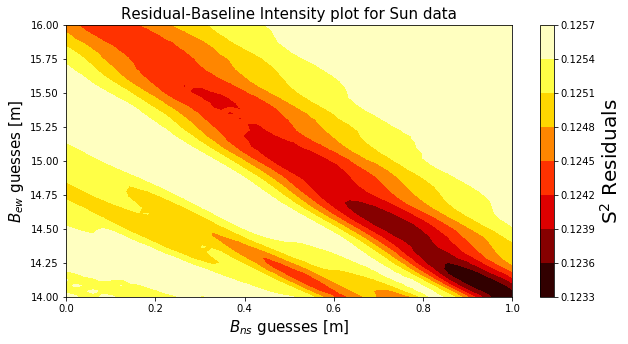

195
0.12334139785860918
The global minimum from our Sun data corresponds to a minimum residual of 0.12334139785860918 at the point( 0.9183673469387754 meters, 14.122448979591837 meters). The coefficients of A and B are 4.17753579685e-05 0.000174615188488


In [596]:
plt.figure(figsize=(10,5))
plt.title('Residual-Baseline Intensity plot for Sun data',fontsize =15)
plt.xlabel('$B_{ns}$ guesses [m]',fontsize = 15)
plt.ylabel('$B_{ew}$ guesses [m]',fontsize = 15)
plt.contourf(sunBns,sunBew,res.reshape(50,50),cmap='hot')
cbar = plt.colorbar()
cbar.set_label('S$^2$ Residuals ',fontsize = 20)
plt.show()

BEWsun = []
BNSsun = []
for i in range(int(len(sunBew))):
    swag = sunBew[i]
    for k in range(int(len(sunBew))):
        BEWsun.append(swag)
    for l in range(int(len(sunBns))):
        BNSsun.append(sunBns[l])
BEWsun = np.asarray(BEWsun)
BNSsun = np.asarray(BNSsun)
        
bsun = np.asarray(zip(BEWsun,BNSsun,res))
z = []
for i in range(int(len(res))):
    if res[i] == min(res):
        print(i)
        z.append(i)
print(min(res))

print('The global minimum from our Sun data corresponds to a minimum residual of ' + str(bsun[z[0]][2]) +' at the point' + '( ' + 
      str(bsun[z[0]][1]) + ' meters, ' + str(bsun[z][0][0]) + ' meters).' + ' The coefficients of A and B are ' + str(Asun[z[0]]) + ' ' +
     str(Bsun[z[0]]) )








In [597]:
lam = 2.5e-2
Fsun = Asun[z[0]]*np.cos(np.radians(2*np.pi*(bsun[z[0]][0]/lam)*np.cos(np.radians(delta))*np.cos(np.radians(ha_sun[:-5000])))) + Bsun[z[0]]*np.sin(np.radians(2*np.pi*(bsun[z[0]][0]/lam)*np.sin(np.radians(L))*np.cos(np.radians(delta))*np.cos(np.radians(ha_sun[:-5000])))) 

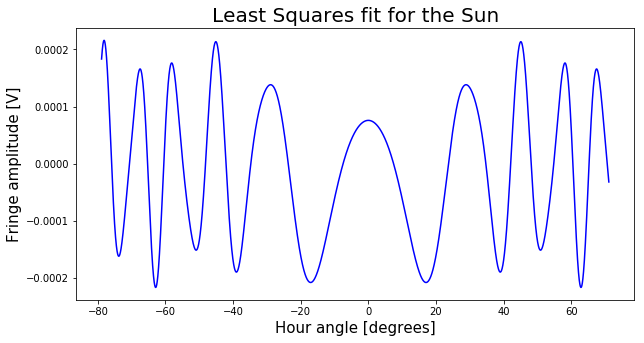

In [598]:
plt.figure(figsize=(10,5))
plt.plot(ha_sun[:-5000],Fsun,'b')
plt.title('Least Squares fit for the Sun',fontsize = 20)
plt.xlabel('Hour angle [degrees]',fontsize = 15)
plt.ylabel('Fringe amplitude [V]',fontsize = 15)
plt.show()

### The next few cells involve numerically differentiating the contour plot displayed above inorder to obtain our [$\alpha$] matrix that has matrix elements of second order derivatives evaluated at the global minimum in our contour plot. 

In [599]:
Bsun_slice = []
for i in range(n):
    slices = bsun[n*i:n*(i+1)]
    Bsun_slice.append(slices)

In [600]:
Ysun = []
for i in range(len(Bsun_slice)):
    for k in range(len(Bsun_slice)):
        y = Bsun_slice[k][i][2]
        Ysun.append(y)
Ysun = np.asarray(Ysun)
Ynew_sun = np.asarray(Ysun).reshape(n,n)


In [601]:
bEWsun = []
bNSsun = []
for i in range(int(len(sunBns))):
    swag = sunBns[i]
    for k in range(int(len(sunBns))):
        bEWsun.append(swag)
    for l in range(int(len(sunBew))):
        bNSsun.append(sunBew[l])
Zsun = []
B_SUN = np.asarray(zip(bEWsun,bNSsun,Ysun))
for i in range(int(len(Ysun))):
    if Ysun[i] == min(Ysun):
        print(i)
        Zsun.append(i)        


2253


In [602]:
DS_dQew_sun = []
for i in range(len(Ynew_sun)):
    Dy_dy = first_derivative(sunBew,Ynew_sun[i])
    DS_dQew_sun.append(Dy_dy)
DS_dQew_sun = np.asarray(DS_dQew_sun)

DS2_dQew2_sun = [] ### this is finding the second derivative of our contour with respect to Qew 
for l in range(len(DS_dQew_sun)):
    Dy2_dy2 = first_derivative(sunBew,DS_dQew_sun[l])
    DS2_dQew2_sun.append(Dy2_dy2)
DS2_dQew2_sun = np.asarray(DS2_dQew2_sun)
alpha_11 = 0.5*DS2_dQew2_sun.reshape(n**2,1)[Zsun[0]]*(lam/np.cos(np.radians(delta)))
print(alpha_11)

DS2_dQewdQns_sun = []### this is finding the second derivative of our contour with respect to Qew and then Qns
for l in range(len(DS_dQew_sun)):
    Dy2_dy2 = first_derivative(sunBns,DS_dQew_sun[l])
    DS2_dQewdQns_sun.append(Dy2_dy2)
DS2_dQewdQns_sun = np.asarray(DS2_dQewdQns_sun)
alpha_12 = 0.5*DS2_dQewdQns_sun.reshape(n**2,1)[Zcas[0]]*((lam)**2)/(((np.cos(np.radians(delta)))**2)*np.sin(np.radians(L)))
print(alpha_12)



[0.00124191]
[-2.0248016e-06]


In [603]:
ressun = res.reshape(n,n)
DS_dQns_sun = []
for i in range(len(ressun)):
    Dy_dx = first_derivative(sunBns,ressun[i])
    DS_dQns_sun.append(Dy_dx)
DS_dQns_sun = np.asarray(DS_dQns_sun)

DS2_dQns2_sun = []
for l in range(len(DS_dQns_sun)):
    Dy2_dx2 = first_derivative(sunBns,DS_dQns_sun[l])
    DS2_dQns2_sun.append(Dy2_dx2)
DS2_dQns2_sun = np.asarray(DS2_dQns2_sun)
alpha_22 = 0.5*DS2_dQns2_sun.reshape(n**2,1)[Zsun[0]]
alpha_22*(lam/(np.cos(np.radians(delta))*np.sin(np.radians(L))))

array([0.00094082])

In [625]:
alphas = np.matrix([[float(alpha_11),float(alpha_12)],[float(alpha_12),float(alpha_22)]])
gg = np.linalg.inv(alphas)
vardc_sun= Ssun[z[0]]*np.diag(np.abs(gg))
sunvar = np.asarray(np.sqrt(vardc_sun))
print('The uncertainty for the EW baseline is ' + str(sunvar[0][0]) + ' meters and the uncertainty for the NS baseline is ' + str(sunvar[0][1]) + ' meters using the sun data. ')

The uncertainty for the EW baseline is 0.026261506831356952 meters and the uncertainty for the NS baseline is 0.006091481776611362 meters using the sun data. 


In [567]:
moonBew = np.linspace(14,17,n)
moonBns = np.linspace(0,1,n)
lam = 2.5e-2
delta = np.mean(dec_moon[:-5000])
L = 37.871853
hmoon = ha_moon[:-5000]

MOONQew = (moonBew/lam)*np.cos(np.radians(delta))
MOONQns = (moonBns/lam)*np.sin(np.radians(L))*np.cos(np.radians(delta))
git = np.sin(np.radians(hmoon))
get = np.cos(np.radians(hmoon))

In [568]:
remoon = []
Amoon = []
Bmoon = []
Smoon =[]
for i in range(int(len(MOONQew))):
    swag = MOONQew[i]
    for k in range(int(len(MOONQns))):
        nu_tau = swag*git + MOONQns[k]*get

        X1 = np.cos(2*np.pi*nu_tau)
        X2 = np.sin(2*np.pi*nu_tau)
        F = volt_newmoon

        X = np.matrix([[X1[i],X2[i]] for i in range(len(X1))])
        Y = np.matrix([[F[i]] for i in range(len(X1))])


        alpha = np.dot(X.T,X)
        beta = np.dot(X.T,Y)

        alpha_inv = np.linalg.inv(alpha)

        a = np.dot(alpha_inv,beta)

        A = float(a[0])
        B = float(a[1])
        ybar = np.dot(X,a)   #estiamted values of voltages from model
        dely = Y - ybar      #Residuals

        s_sq = np.dot(dely.T,dely)/(len(F)-len(a))

        diag_inva = np.diag(alpha_inv)

        vardc = s_sq*diag_inva
        dc = np.diag(alpha_inv)

        ncov = alpha_inv/(np.sqrt(np.outer(dc,dc)))
        dely = np.asarray(dely)
        S = np.sum(dely**2)
        remoon.append(S)
        Amoon.append(A)
        Bmoon.append(B)
        Smoon.append(s_sq)


In [569]:
resmoon = np.asarray(remoon)
xx, yy = np.meshgrid(sunBew,sunBns,sparse=False)

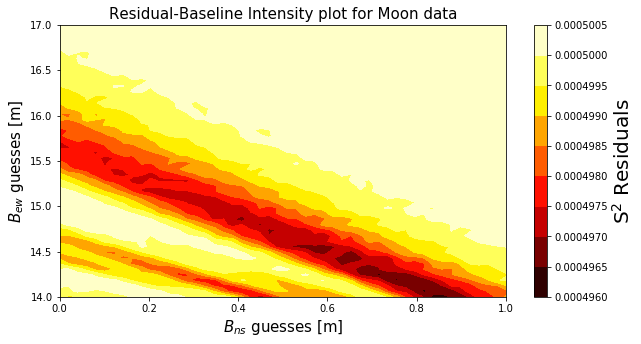

42
0.0004963080785723444
The global minimum from our Sun data corresponds to a minimum residual of 0.0004963080785723444 at the point( 0.8571428571428571 meters, 14.0 meters). The coefficients of A and B are -1.44872341008e-06 -7.0364330466e-06


In [570]:
plt.figure(figsize=(10,5))
plt.title('Residual-Baseline Intensity plot for Moon data',fontsize =15)
plt.xlabel('$B_{ns}$ guesses [m]',fontsize = 15)
plt.ylabel('$B_{ew}$ guesses [m]',fontsize = 15)
plt.contourf(moonBns,moonBew,resmoon.reshape(n,n),cmap='hot')
cbar = plt.colorbar()
cbar.set_label('S$^2$ Residuals ',fontsize = 20)
plt.show()

BEWmoon = []
BNSmoon = []
for i in range(int(len(moonBew))):
    swag = moonBew[i]
    for k in range(int(len(moonBew))):
        BEWmoon.append(swag)
    for l in range(int(len(moonBns))):
        BNSmoon.append(moonBns[l])
BEWmoon = np.asarray(BEWmoon)
BNSmoon = np.asarray(BNSmoon)
zmoon = []    
bmoon = np.asarray(zip(BEWmoon,BNSmoon,resmoon))
for i in range(int(len(resmoon))):
    if resmoon[i] == min(resmoon):
        print(i)
        zmoon.append(i)
print(min(resmoon))

print('The global minimum from our Sun data corresponds to a minimum residual of ' + str(bmoon[zmoon[0]][2]) +' at the point' + '( ' + 
      str(bmoon[zmoon[0]][1]) + ' meters, ' + str(bmoon[zmoon[0]][0]) + ' meters).' + ' The coefficients of A and B are ' + str(Amoon[zmoon[0]]) + ' ' +
     str(Bmoon[zmoon[0]]) )








In [571]:
lam = 2.5e-2
Fmoon = Amoon[zmoon[0]]*np.cos(np.radians(2*np.pi*(bmoon[zmoon[0]][0]/lam)*np.cos(np.radians(delta))*np.cos(np.radians(ha_moon[:-5000])))) + Bsun[77]*np.sin(np.radians(2*np.pi*(bmoon[zmoon[0]][0]/lam)*np.sin(np.radians(L))*np.cos(np.radians(delta))*np.cos(np.radians(ha_moon[:-5000])))) 

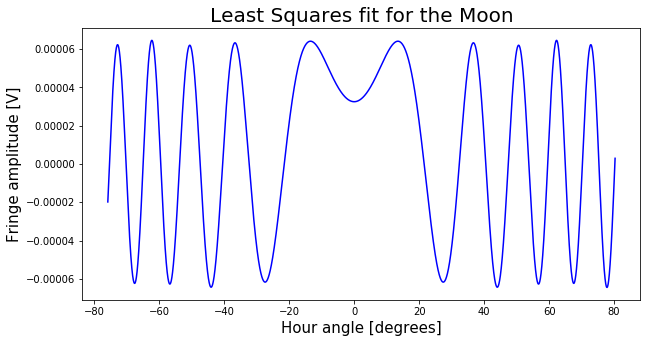

In [572]:
plt.figure(figsize=(10,5))
plt.plot(ha_moon[:-5000],Fmoon,'b')
plt.title('Least Squares fit for the Moon',fontsize = 20)
plt.xlabel('Hour angle [degrees]',fontsize = 15)
plt.ylabel('Fringe amplitude [V]',fontsize = 15)
plt.show()

### The next few cells involve numerically differentiating the contour plot displayed above inorder to obtain our [$\alpha$] matrix that has matrix elements of second order derivatives evaluated at the global minimum in our contour plot. 

In [573]:
Bmoon_slice = []
for i in range(n):
    slices = bmoon[n*i:n*(i+1)]
    Bmoon_slice.append(slices)

In [574]:
Ymoon = []
for i in range(len(Bmoon_slice)):
    for k in range(len(Bmoon_slice)):
        y = Bmoon_slice[k][i][2]
        Ymoon.append(y)
Ymoon = np.asarray(Ymoon)
Ynew_moon = np.asarray(Ymoon).reshape(n,n)


In [575]:
bEWmoon = []
bNSmoon = []
for i in range(int(len(moonBns))):
    swag = moonBns[i]
    for k in range(int(len(moonBns))):
        bEWmoon.append(swag)
    for l in range(int(len(moonBew))):
        bNSmoon.append(moonBew[l])
Zmoon = []
B_MOON = np.asarray(zip(bEWmoon,bNSmoon,Ymoon))
for i in range(int(len(Ymoon))):
    if Ymoon[i] == min(Ymoon):
        print(i)
        Zmoon.append(i)        

2100


In [576]:
DS_dQew_moon = []
for i in range(len(Ynew_moon)):
    Dy_dy = first_derivative(moonBew,Ynew_moon[i])
    DS_dQew_moon.append(Dy_dy)
DS_dQew_moon = np.asarray(DS_dQew_moon)

DS2_dQew2_moon = [] ### this is finding the second derivative of our contour with respect to Qew 
for l in range(len(DS_dQew_moon)):
    Dy2_dy2 = first_derivative(moonBew,DS_dQew_moon[l])
    DS2_dQew2_moon.append(Dy2_dy2)
DS2_dQew2_moon = np.asarray(DS2_dQew2_moon)
alpha_11 = 0.5*DS2_dQew2_moon.reshape(n**2,1)[Zmoon[0]]*(lam/np.cos(np.radians(delta)))
print(alpha_11)

DS2_dQewdQns_moon = []### this is finding the second derivative of our contour with respect to Qew and then Qns
for l in range(len(DS_dQew_moon)):
    Dy2_dy2 = first_derivative(moonBns,DS_dQew_moon[l])
    DS2_dQewdQns_moon.append(Dy2_dy2)
DS2_dQewdQns_moon = np.asarray(DS2_dQewdQns_moon)
alpha_12 = 0.5*DS2_dQewdQns_moon.reshape(n**2,1)[Zcas[0]]*((lam)**2)/(((np.cos(np.radians(delta)))**2)*np.sin(np.radians(L)))
print(alpha_12)

[-8.10909605e-07]
[2.92299515e-08]


In [578]:
resmo = resmoon.reshape(n,n)
DS_dQns_moon = []
for i in range(len(resmo)):
    Dy_dx = first_derivative(moonBns,resmo[i])
    DS_dQns_moon.append(Dy_dx)
DS_dQns_moon = np.asarray(DS_dQns_moon)

DS2_dQns2_moon = []
for l in range(len(DS_dQns_moon)):
    Dy2_dx2 = first_derivative(moonBns,DS_dQns_moon[l])
    DS2_dQns2_moon.append(Dy2_dx2)
DS2_dQns2_moon = np.asarray(DS2_dQns2_moon)
alpha_22 = 0.5*DS2_dQns2_moon.reshape(n**2,1)[Zmoon[0]]
alpha_22*(lam/(np.cos(np.radians(delta))*np.sin(np.radians(L))))

array([-2.42007621e-06])

In [626]:
alphas = np.matrix([[float(alpha_11),float(alpha_12)],[float(alpha_12),float(alpha_22)]])
gg = np.linalg.inv(alphas)
vardc_moon= Smoon[zmoon[0]]*np.diag(np.abs(gg))
moonvar = np.asarray(np.sqrt(vardc_moon))
print('The uncertainty for the EW baseline is ' + str(moonvar[0][0]) + ' meters and the uncertainty for the NS baseline is ' + str(moonvar[0][1]) + ' meters using the moon data. ')

The uncertainty for the EW baseline is 0.001611672435846636 meters and the uncertainty for the NS baseline is 0.0003738351091531541 meters using the moon data. 


## Measuring 1-d brightness of distributions: The first step of making maps

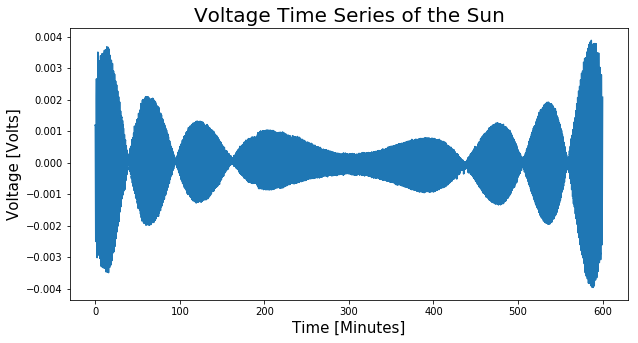

In [574]:
plt.figure(figsize=(10,5))
plt.plot(time_newsun/60,volt_newsun)
plt.title('Voltage Time Series of the Sun',fontsize=20)
plt.xlabel('Time [Minutes]',fontsize=15)
plt.ylabel('Voltage [Volts]',fontsize=15)
plt.show()

In [175]:
from scipy.signal import hilbert, chirp
analytic_sig_sun = hilbert(volt_newsun)


In [176]:
amp_envelope_sig = np.abs(analytic_sig_sun)

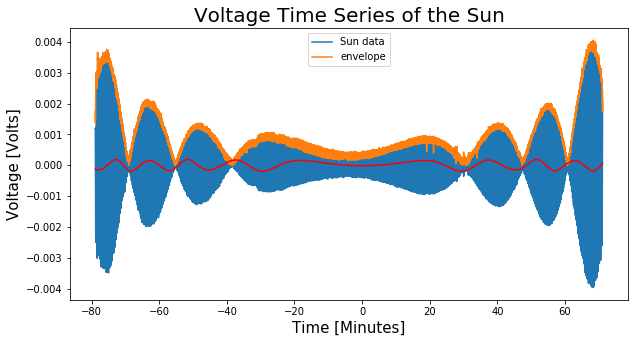

In [293]:
plt.figure(figsize=(10,5))
plt.plot(ha_sun[:-5000],volt_newsun)
plt.plot(ha_sun[:-5000],amp_envelope_sig)
plt.plot(ha_sun[:-5000],Fsun,'r-')
plt.title('Voltage Time Series of the Sun',fontsize=20)
plt.xlabel('Time [Minutes]',fontsize=15)
plt.ylabel('Voltage [Volts]',fontsize=15)
plt.legend(['Sun data','envelope'],loc='upper center')
plt.show()

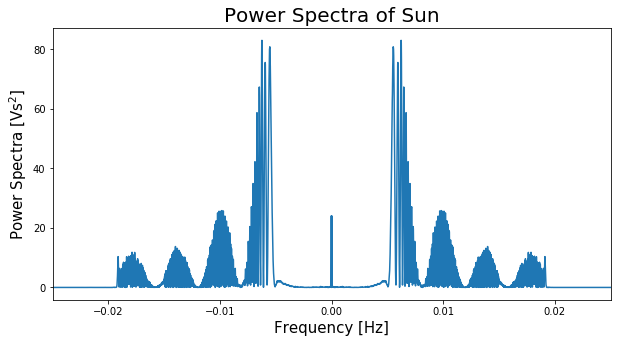

In [292]:
power_sun = np.abs(np.fft.fft(volt_newsun))**2
freq_sun = np.fft.fftfreq(len(volt_newsun),d=0.5)
plt.figure(figsize=(10,5))
plt.plot(np.fft.fftshift(freq_sun),np.fft.fftshift(power_sun))
plt.title('Power Spectra of Sun',fontsize = 20)
plt.xlabel('Frequency [Hz]',fontsize=15)
plt.ylabel('Power Spectra [Vs$^2$]',fontsize = 15)
plt.xlim(-0.025,0.025)
plt.show()



In [588]:
analytic_psun = hilbert(np.fft.fftshift(power_sun))
amp_envelope_psun = np.abs(analytic_psun)

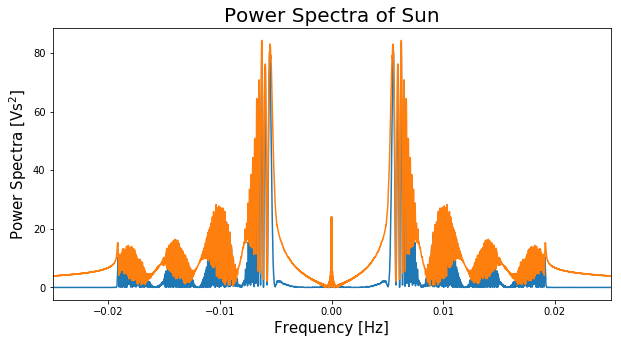

In [589]:
plt.figure(figsize=(10,5))
plt.plot(np.fft.fftshift(freq_sun),np.fft.fftshift(power_sun))
plt.plot(np.fft.fftshift(freq_sun),amp_envelope_psun)
plt.title('Power Spectra of Sun',fontsize = 20)
plt.xlabel('Frequency [Hz]',fontsize=15)
plt.ylabel('Power Spectra [Vs$^2$]',fontsize = 15)
plt.xlim(-0.025,0.025)
plt.show()
